In [36]:
from src.main import load_dataset, create_mask, create_super_sample, create_kmeans
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np

In [30]:
train, labels = load_dataset("dataset/train")
X_train, X_test, y_train, y_test = train_test_split(train, labels, test_size=0.2, random_state=42, stratify=labels)

masks_train = [create_mask(img) for img in X_train]
masks_test = [create_mask(img) for img in X_test]

super_sample = create_super_sample(X_train, masks_train)

In [31]:
kmeans = create_kmeans(super_sample)

# color_lut = np.uint8(kmeans.cluster_centers_)
labels_maps_train = [kmeans.predict(img[mask]) for (img, mask) in zip(X_train, masks_train)]
color_histograms_train = np.array([np.bincount(lm, minlength=len(kmeans.cluster_centers_)) / len(lm) for lm in labels_maps_train], dtype=np.float64)

labels_maps_test = [kmeans.predict(img[mask]) for (img, mask) in zip(X_test, masks_test)]
color_histograms_test = np.array([np.bincount(lm, minlength=len(kmeans.cluster_centers_)) / len(lm) for lm in labels_maps_test], dtype=np.float64)

print(color_histograms_train[0].shape)
print(color_histograms_train[0].dtype)
print(color_histograms_train.shape)

(24,)
float64
(228, 24)


In [32]:
dist_mat = cdist(color_histograms_test, color_histograms_train, metric='cosine')

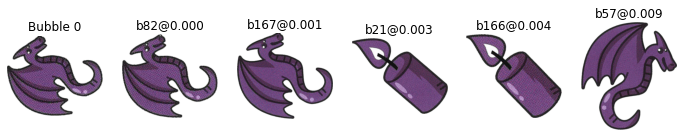

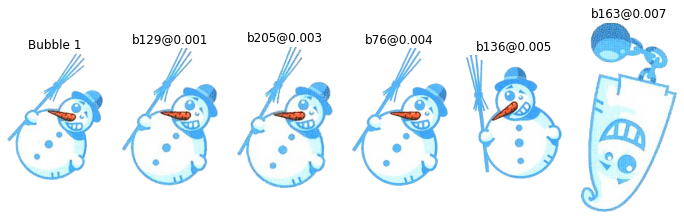

In [38]:
# Display the best matches for some bubbles
max_res = 5
interesting_bubble_ids = [0, 1]
idx_of_best_matches_per_row = np.argsort(dist_mat, axis=1)

for ii in interesting_bubble_ids:
    plt.figure(figsize=(12,8))
    columns = max_res + 1
    plt.subplot(1, columns, 1)
    plt.imshow(X_test[ii])
    plt.axis("off"); plt.title("Bubble %d"%(ii,))
    for jj in range(max_res):
        bb_idx = idx_of_best_matches_per_row[ii, jj]  # Read the id of each best match for current bubble
        plt.subplot(1, columns, jj+2)
        plt.imshow(X_train[bb_idx])
        plt.axis("off"); plt.title("b%d@%.3f" % (bb_idx, dist_mat[ii, bb_idx])) # display bubble id and dist.
    plt.show()